In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = 'Bird Strikes data.xlsx'
bird_strikes_df = pd.read_excel(file_path, sheet_name='Bird Strikes')
bird_strikes_df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [ ]:
# Convert the FlightDate column to datetime
bird_strikes_df['FlightDate'] = pd.to_datetime(bird_strikes_df['FlightDate'], errors='coerce')

In [ ]:
 #Extract the year from the FlightDate
bird_strikes_df['Year'] = bird_strikes_df['FlightDate'].dt.year

In [ ]:
 #Yearly analysis of bird strikes in the US
yearly_bird_strikes = bird_strikes_df['Year'].value_counts().sort_index()


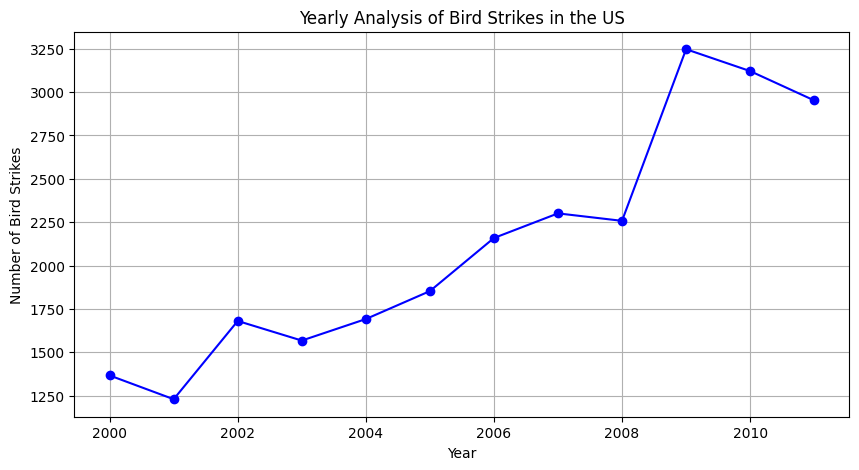

In [ ]:
# Plot the yearly analysis
plt.figure(figsize=(10, 5))
plt.plot(yearly_bird_strikes.index, yearly_bird_strikes.values, marker='o', linestyle='-', color='b')
plt.title('Yearly Analysis of Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()


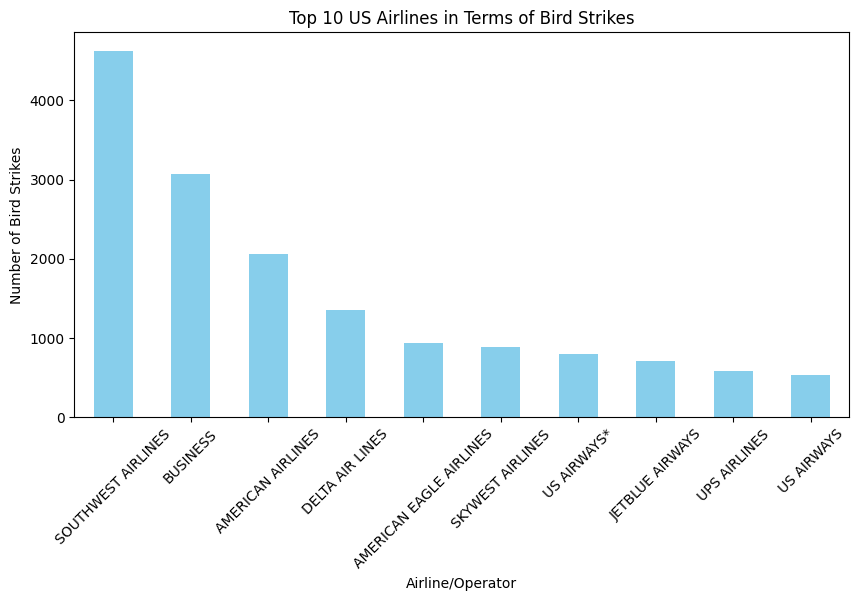

In [ ]:
# Top 10 US Airlines in terms of having encountered bird strikes
top_airlines = bird_strikes_df['Aircraft: Airline/Operator'].value_counts().head(10)
top_airlines

# Plot the top 10 US airlines
plt.figure(figsize=(10, 5))
top_airlines.plot(kind='bar', color='skyblue')
plt.title('Top 10 US Airlines in Terms of Bird Strikes')
plt.xlabel('Airline/Operator')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Airports with most incidents of bird strikes – Top 50
top_airports = bird_strikes_df['Airport: Name'].value_counts().head(50)

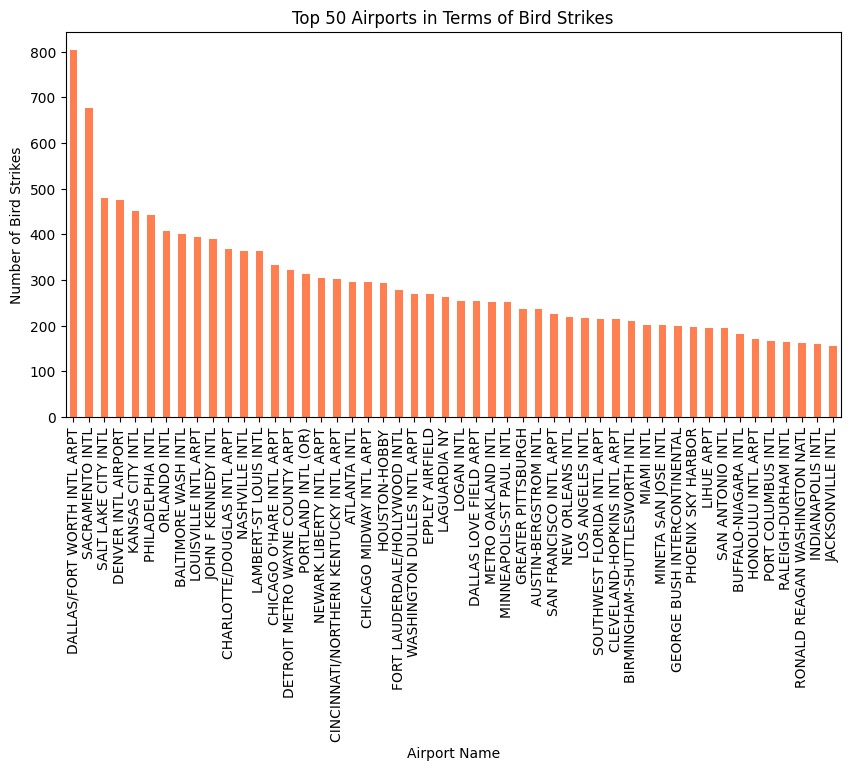

In [ ]:
# Plot the top 50 airports
plt.figure(figsize=(10, 5))
top_airports.plot(kind='bar', color='coral')
plt.title('Top 50 Airports in Terms of Bird Strikes')
plt.xlabel('Airport Name')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=90)
plt.show()

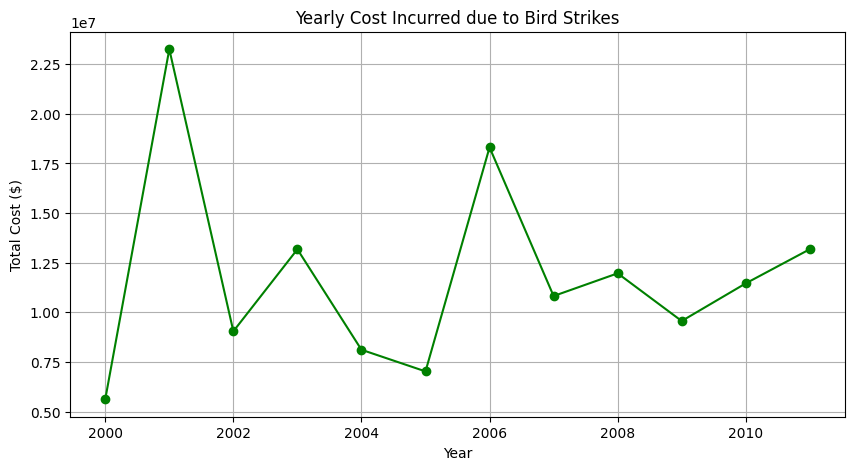

In [ ]:
# Yearly Cost Incurred due to Bird Strikes
yearly_costs = bird_strikes_df.groupby('Year')['Cost: Total $'].sum()
# Plot the yearly costs
plt.figure(figsize=(10, 5))
plt.plot(yearly_costs.index, yearly_costs.values, marker='o', linestyle='-', color='g')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.show()

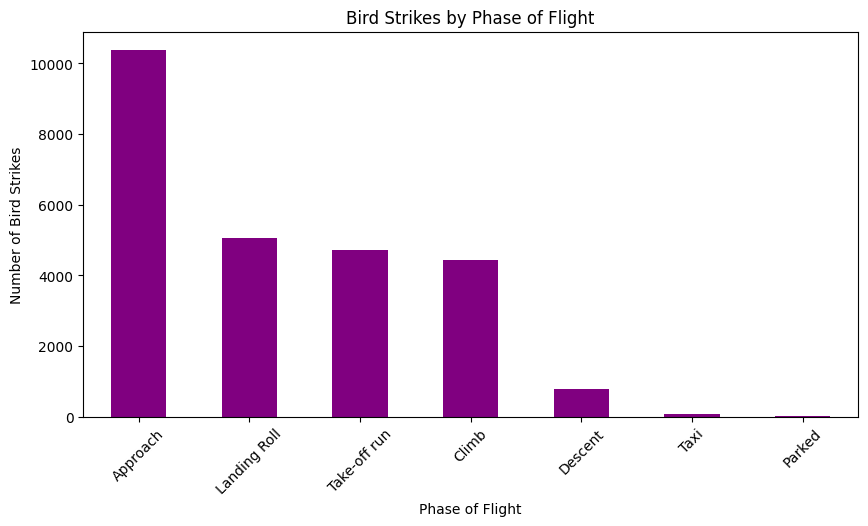

In [ ]:
# When do most bird strikes occur?
phase_of_flight = bird_strikes_df['When: Phase of flight'].value_counts()
# Plot the phase of flight
plt.figure(figsize=(10, 5))
phase_of_flight.plot(kind='bar', color='purple')
plt.title('Bird Strikes by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()


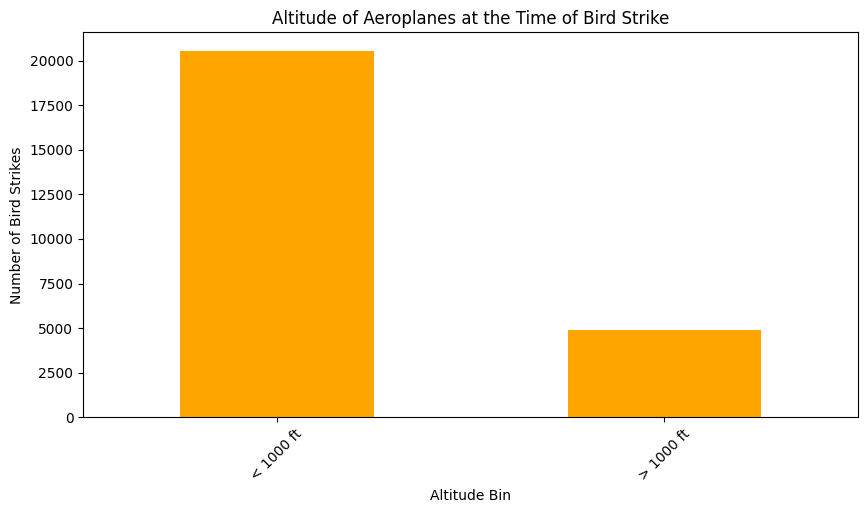

In [ ]:
# Altitude of aeroplanes at the time of strike
altitude_bins = bird_strikes_df['Altitude bin'].value_counts()
# Plot the altitude bins
plt.figure(figsize=(10, 5))
altitude_bins.plot(kind='bar', color='orange')
plt.title('Altitude of Aeroplanes at the Time of Bird Strike')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

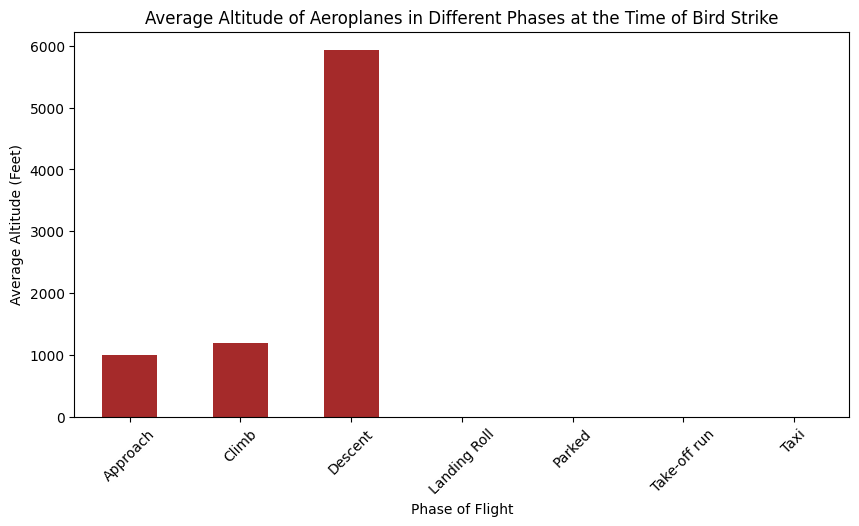

In [ ]:
 #Average Altitude of the aeroplanes in different phases at the time of strike
average_altitude = bird_strikes_df.groupby('When: Phase of flight')['Feet above ground'].mean().dropna()
#Plot the average altitude
plt.figure(figsize=(10, 5))
average_altitude.plot(kind='bar', color='brown')
plt.title('Average Altitude of Aeroplanes in Different Phases at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet)')
plt.xticks(rotation=45)
plt.show()


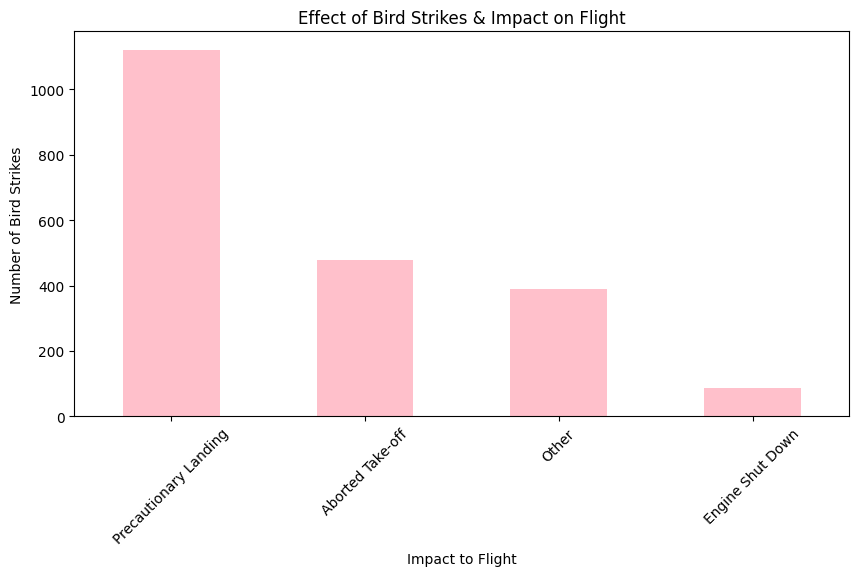

In [ ]:
# Effect of Bird Strikes & Impact on Flight
impact_on_flight = bird_strikes_df['Effect: Impact to flight'].value_counts()
# Plot the impact on flight
plt.figure(figsize=(10, 5))
impact_on_flight.plot(kind='bar', color='pink')
plt.title('Effect of Bird Strikes & Impact on Flight')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

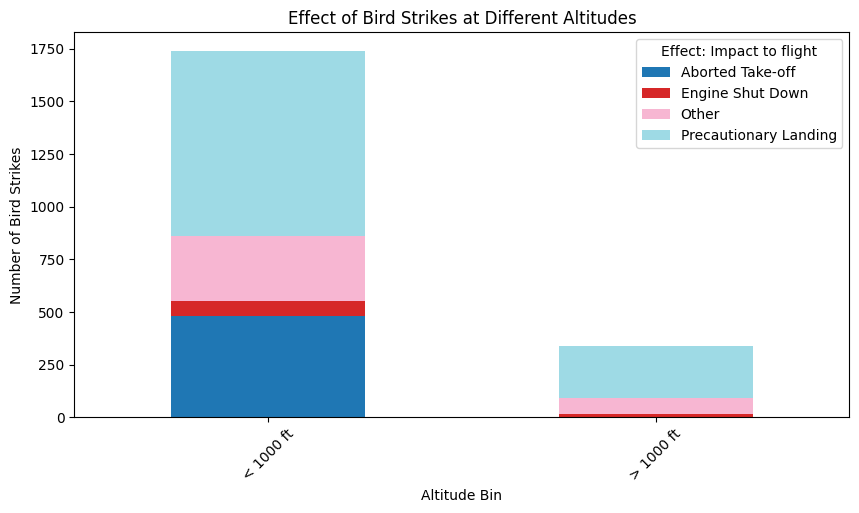

In [ ]:
# Effect of Strike at Different Altitude
effect_by_altitude = bird_strikes_df.groupby('Altitude bin')['Effect: Impact to flight'].value_counts().unstack().fillna(0)
# Plot the effect by altitude
effect_by_altitude.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='tab20')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()


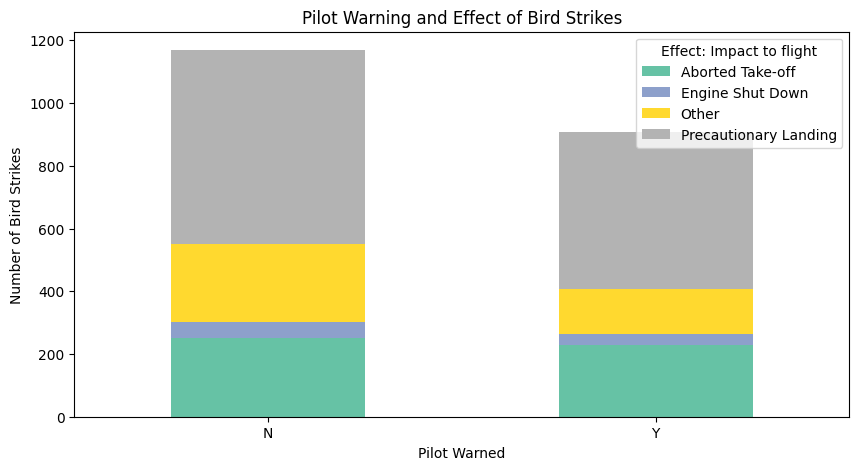

In [ ]:
# Were Pilots Informed? & Prior Warning and Effect of Strike Relation
pilot_warning_effect = bird_strikes_df.groupby(['Pilot warned of birds or wildlife?', 'Effect: Impact to flight']).size().unstack().fillna(0)
# Plot the pilot warning effect
pilot_warning_effect.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set2')
plt.title('Pilot Warning and Effect of Bird Strikes')
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.show()